In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv("Ames_housing_outlier.csv")

In [3]:
df.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  526301100           20        RL         141.0     31770   Pave   NaN   
1  526350040           20        RH          80.0     11622   Pave   NaN   
2  526351010           20        RL          81.0     14267   Pave   NaN   
3  526353030           20        RL          93.0     11160   Pave   NaN   
4  527105010           60        RL          74.0     13830   Pave   NaN   

  Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence Misc Feature  \
0       IR1          Lvl    AllPub  ...         0     NaN    NaN          NaN   
1       Reg          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   
2       IR1          Lvl    AllPub  ...         0     NaN    NaN         Gar2   
3       Reg          Lvl    AllPub  ...         0     NaN    NaN          NaN   
4       IR1          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  SalePrice  
0        0       5    2010        WD           Normal     215000  
1        0       6    2010        WD           Normal     105000  
2    12500       6    2010        WD           Normal     172000  
3        0       4    2010        WD           Normal     244000  
4        0       3    2010        WD           Normal     189900  

[5 rows x 81 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2907 non-null   int64  
 1   MS SubClass      2907 non-null   int64  
 2   MS Zoning        2907 non-null   object 
 3   Lot Frontage     2421 non-null   float64
 4   Lot Area         2907 non-null   int64  
 5   Street           2907 non-null   object 
 6   Alley            195 non-null    object 
 7   Lot Shape        2907 non-null   object 
 8   Land Contour     2907 non-null   object 
 9   Utilities        2907 non-null   object 
 10  Lot Config       2907 non-null   object 
 11  Land Slope       2907 non-null   object 
 12  Neighborhood     2907 non-null   object 
 13  Condition 1      2907 non-null   object 
 14  Condition 2      2907 non-null   object 
 15  Bldg Type        2907 non-null   object 
 16  House Style      2907 non-null   object 
 17  Overall Qual  

In [5]:
df.shape

(2907, 81)

In [6]:
#code for Read the txt in jupyter notebook

with open ('Ames_Housing_Feature_Description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# Data Cleaning for missing data

1. Remove

In [7]:
#Removing PID - because it only number ID for the house. Not used for prediction the house pricing

df = df.drop(['PID' ], axis=1)

In [8]:
df.shape

(2907, 80)

2. observing NaN features

In [9]:
df.isnull()
pd.options.display.max_rows = None

#Missing Data = True
#Non Missing Data = False

3. Calculate sum missing Data

In [10]:
100* df.isnull().sum()/len(df)

MS SubClass         0.000000
MS Zoning           0.000000
Lot Frontage       16.718266
Lot Area            0.000000
Street              0.000000
Alley              93.292054
Lot Shape           0.000000
Land Contour        0.000000
Utilities           0.000000
Lot Config          0.000000
Land Slope          0.000000
Neighborhood        0.000000
Condition 1         0.000000
Condition 2         0.000000
Bldg Type           0.000000
House Style         0.000000
Overall Qual        0.000000
Overall Cond        0.000000
Year Built          0.000000
Year Remod/Add      0.000000
Roof Style          0.000000
Roof Matl           0.000000
Exterior 1st        0.000000
Exterior 2nd        0.000000
Mas Vnr Type        0.756794
Mas Vnr Area        0.756794
Exter Qual          0.000000
Exter Cond          0.000000
Foundation          0.000000
Bsmt Qual           2.717578
Bsmt Cond           2.717578
Bsmt Exposure       2.820777
BsmtFin Type 1      2.717578
BsmtFin SF 1        0.034400
BsmtFin Type 2

4. Filter Missing data

In [11]:
# Code to only call the features that have missing data

def percent_missing(df):
    percent_nan = 100* df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [12]:
percent_nan = percent_missing(df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage Area'),
  Text(2, 0, 'Bsmt Half Bath'),
  Text(3, 0, 'Bsmt Full Bath'),
  Text(4, 0, 'Total Bsmt SF'),
  Text(5, 0, 'Bsmt Unf SF'),
  Text(6, 0, 'BsmtFin SF 1'),
  Text(7, 0, 'BsmtFin SF 2'),
  Text(8, 0, 'Garage Cars'),
  Text(9, 0, 'Mas Vnr Area'),
  Text(10, 0, 'Mas Vnr Type'),
  Text(11, 0, 'BsmtFin Type 2'),
  Text(12, 0, 'Bsmt Cond'),
  Text(13, 0, 'Bsmt Qual'),
  Text(14, 0, 'BsmtFin Type 1'),
  Text(15, 0, 'Bsmt Exposure'),
  Text(16, 0, 'Garage Type'),
  Text(17, 0, 'Garage Finish'),
  Text(18, 0, 'Garage Qual'),
  Text(19, 0, 'Garage Cond'),
  Text(20, 0, 'Garage Yr Blt'),
  Text(21, 0, 'Lot Frontage'),
  Text(22, 0, 'Fireplace Qu'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc Feature'),
  Text(26, 0, 'Pool QC')])

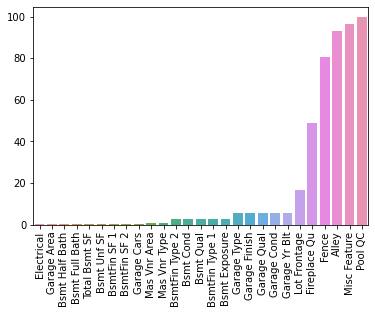

In [13]:
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation=90)

In [14]:
#Zooming the graph
#Set 1% threshold

fig, ax = plt.subplots(figsize=(15,5))

sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation=90)

plt.ylim(0,1)

(0.0, 1.0)

In [15]:
percent_nan[percent_nan <1]

Electrical        0.034400
Garage Area       0.034400
Bsmt Half Bath    0.034400
Bsmt Full Bath    0.034400
Total Bsmt SF     0.034400
Bsmt Unf SF       0.034400
BsmtFin SF 1      0.034400
BsmtFin SF 2      0.034400
Garage Cars       0.034400
Mas Vnr Area      0.756794
Mas Vnr Type      0.756794
dtype: float64

# Basement

1. For Bsmt Numerical Data, fillna with [0]

In [16]:
df[df['Total Bsmt SF'].isnull()]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
1332           20        RM          99.0      5940   Pave   NaN       IR1   

     Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
1332          Lvl    AllPub        FR3  ...         0     NaN  MnPrv   

     Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  \
1332          NaN        0       4     2008      ConLD         Abnorml   

      SalePrice  
1332      79000  

[1 rows x 80 columns]

In [17]:
df[df['Bsmt Unf SF'].isnull()]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
1332           20        RM          99.0      5940   Pave   NaN       IR1   

     Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
1332          Lvl    AllPub        FR3  ...         0     NaN  MnPrv   

     Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  \
1332          NaN        0       4     2008      ConLD         Abnorml   

      SalePrice  
1332      79000  

[1 rows x 80 columns]

In [18]:
#Buat group for Basement SF then fillna with 0

bsmt_num_cols = ['Total Bsmt SF','Bsmt Half Bath','Bsmt Full Bath','Bsmt Unf SF','BsmtFin SF 1','BsmtFin SF 2']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [19]:
#Checking if still have missing Data in the features

df[df['BsmtFin SF 1'].isnull()]

Empty DataFrame
Columns: [MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, Sale Condition, SalePrice]
Index: []

[0 rows x 80 columns]

In [20]:
#Checking if still have missing Data in the features by "group"

df[['Total Bsmt SF','Bsmt Half Bath','Bsmt Full Bath','Bsmt Unf SF','BsmtFin SF 1','BsmtFin SF 2']].isnull().sum()

Total Bsmt SF     0
Bsmt Half Bath    0
Bsmt Full Bath    0
Bsmt Unf SF       0
BsmtFin SF 1      0
BsmtFin SF 2      0
dtype: int64

2. For Bsmt categorical Data fillna with [None]

In [21]:
# Buat group the Fillna with ('None')

bsmt_cat_cols = ['BsmtFin Type 2','Bsmt Cond','Bsmt Qual','BsmtFin Type 1','Bsmt Exposure']
df[bsmt_cat_cols] = df[bsmt_cat_cols].fillna('None')

In [22]:
#Checking if still have missing Data in the features by "group"

df[['BsmtFin Type 2','Bsmt Cond','Bsmt Qual','BsmtFin Type 1','Bsmt Exposure']].isnull().sum()

BsmtFin Type 2    0
Bsmt Cond         0
Bsmt Qual         0
BsmtFin Type 1    0
Bsmt Exposure     0
dtype: int64

In [23]:
#Checking if still have missing Data in the features by "row" one by one

df[df['Bsmt Qual'].isnull()]

Empty DataFrame
Columns: [MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, Sale Condition, SalePrice]
Index: []

[0 rows x 80 columns]

(0.0, 1.0)

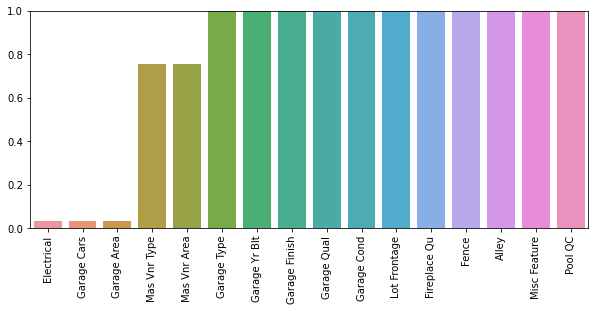

In [24]:
percent_nan = percent_missing(df)


fig, ax = plt.subplots(figsize=(10,4))

sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation=90)

plt.ylim(0,1)

# Mas Vnr

In [25]:
# For the numerical data fillna with 0

df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [26]:
df[df['Mas Vnr Area'].isnull()]

Empty DataFrame
Columns: [MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, Sale Condition, SalePrice]
Index: []

[0 rows x 80 columns]

In [27]:
df[df['Mas Vnr Type'].isnull()]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
54             60        RL           NaN      7851   Pave   NaN       Reg   
479            60        RL           NaN     12891   Pave   NaN       IR1   
512            20        FV          90.0      7993   Pave   NaN       IR1   
533            20        RL          67.0     10083   Pave   NaN       Reg   
861            60        RL          70.0      8749   Pave   NaN       Reg   
1088           60        RL           NaN      7750   Pave   NaN       Reg   
1112           20        RL          87.0     10037   Pave   NaN       Reg   
1115           20        FV          95.0     11639   Pave   NaN       Reg   
1120           60        FV          65.0      8125   Pave   NaN       Reg   
1176           60        FV           NaN      7500   Pave   NaN       Reg   
1445           60        RL          75.0      9473   Pave   NaN       Reg   
1715           60        RL          59.0     15810   Pave   NaN       IR1   
1739           80        RL           NaN     11950   Pave   NaN       IR1   
1768           20        RL          85.0      9965   Pave   NaN       Reg   
1784           60        FV         112.0     12217   Pave   NaN       IR1   
1824          120        FV          30.0      5330   Pave  Pave       IR2   
1825          120        FV          35.0      4274   Pave  Pave       IR1   
2210           20        RL           NaN     32668   Pave   NaN       IR1   
2361           20        RL         107.0     13891   Pave   NaN       Reg   
2371           60        RL         103.0     12867   Pave   NaN       IR1   
2434           20        RL          49.0     15218   Pave   NaN       IR1   
2800           20        RL          75.0      8050   Pave   NaN       Reg   

     Land Contour Utilities Lot Config  ... Pool Area Pool QC Fence  \
54            Lvl    AllPub     Inside  ...         0     NaN   NaN   
479           Lvl    AllPub     Corner  ...         0     NaN   NaN   
512           Lvl    AllPub     Inside  ...         0     NaN   NaN   
533           Lvl    AllPub     Inside  ...         0     NaN   NaN   
861           Lvl    AllPub     Inside  ...         0     NaN   NaN   
1088          Lvl    AllPub     Inside  ...         0     NaN   NaN   
1112          Lvl    AllPub     Corner  ...         0     NaN   NaN   
1115          Lvl    AllPub     Corner  ...         0     NaN   NaN   
1120          Lvl    AllPub     Inside  ...         0     NaN   NaN   
1176          Lvl    AllPub     Inside  ...         0     NaN   NaN   
1445          Lvl    AllPub     Inside  ...         0     NaN   NaN   
1715          Lvl    AllPub     Inside  ...         0     NaN   NaN   
1739          Lvl    AllPub     Corner  ...         0     NaN   NaN   
1768          Lvl    AllPub        FR2  ...         0     NaN   NaN   
1784          Lvl    AllPub     Inside  ...         0     NaN   NaN   
1824          Lvl    AllPub     Inside  ...         0     NaN   NaN   
1825          Lvl    AllPub     Inside  ...         0     NaN   NaN   
2210          Lvl    AllPub    CulDSac  ...         0     NaN   NaN   
2361          Lvl    AllPub     Inside  ...         0     NaN   NaN   
2371          Lvl    AllPub     Corner  ...         0     NaN   NaN   
2434          Lvl    AllPub    CulDSac  ...         0     NaN   NaN   
2800          Lvl    AllPub     Inside  ...         0     NaN   NaN   

     Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  \
54            NaN        0       5     2010        WD           Normal   
479           NaN        0       7     2009        WD           Normal   
512           NaN        0      10     2009        New         Partial   
533           NaN        0       8     2009        WD           Normal   
861           NaN        0      11     2009        WD           Normal   
1088          NaN        0       4     2008        WD           Normal   
1112          NaN        0       8     2008        WD      

In [28]:
# For Mas Vnr categorical data fillna with none

df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

In [29]:
df[df['Mas Vnr Type'].isnull()]

Empty DataFrame
Columns: [MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, Sale Condition, SalePrice]
Index: []

[0 rows x 80 columns]

In [30]:
percent_nan = percent_missing(df)


fig, ax = plt.subplots(figsize=(10,4))

sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation=90)

plt.ylim(0,1)

(0.0, 1.0)

# Garage

In [ ]:
# Kita assume bila grage type = none, maksudnya takde garage. jadi untuk Garage yr blt, kita boleh assume terus jadi zero. tapi kalau garage type = null, maksudnya tak boleh assume garage yr blt tu zero, kita drop kan je senang untuk row tu. haha

In [31]:
df[['Garage Type','Garage Finish','Garage Qual','Garage Cond']].isnull().sum()

Garage Type      156
Garage Finish    158
Garage Qual      158
Garage Cond      158
dtype: int64

In [33]:
garage_data = df[df['Garage Qual'].isnull()== True]
garage_data[['Garage Type','Garage Finish','Garage Qual','Garage Cond', 'Garage Yr Blt']]

#code for know the missing value from the garage data only

Garage Type Garage Finish Garage Qual Garage Cond  Garage Yr Blt
26           NaN           NaN         NaN         NaN            NaN
118          NaN           NaN         NaN         NaN            NaN
124          NaN           NaN         NaN         NaN            NaN
128          NaN           NaN         NaN         NaN            NaN
129          NaN           NaN         NaN         NaN            NaN
169          NaN           NaN         NaN         NaN            NaN
170          NaN           NaN         NaN         NaN            NaN
185          NaN           NaN         NaN         NaN            NaN
202          NaN           NaN         NaN         NaN            NaN
205          NaN           NaN         NaN         NaN            NaN
210          NaN           NaN         NaN         NaN            NaN
212          NaN           NaN         NaN         NaN            NaN
214          NaN           NaN         NaN         NaN            NaN
215          NaN           NaN         NaN         NaN            NaN
216          NaN           NaN         NaN         NaN            NaN
274          NaN           NaN         NaN         NaN            NaN
279          NaN           NaN         NaN         NaN            NaN
289          NaN           NaN         NaN         NaN            NaN
290          NaN           NaN         NaN         NaN            NaN
323          NaN           NaN         NaN         NaN            NaN
328          NaN           NaN         NaN         NaN            NaN
329          NaN           NaN         NaN         NaN            NaN
330          NaN           NaN         NaN         NaN            NaN
389          NaN           NaN         NaN         NaN            NaN
530          NaN           NaN         NaN         NaN            NaN
535          NaN           NaN         NaN         NaN            NaN
609          NaN           NaN         NaN         NaN            NaN
657          NaN           NaN         NaN         NaN            NaN
692          NaN           NaN         NaN         NaN            NaN
695          NaN           NaN         NaN         NaN            NaN
698          NaN           NaN         NaN         NaN            NaN
704          NaN           NaN         NaN         NaN            NaN
707          NaN           NaN         NaN         NaN            NaN
715          NaN           NaN         NaN         NaN            NaN
721          NaN           NaN         NaN         NaN            NaN
722          NaN           NaN         NaN         NaN            NaN
737          NaN           NaN         NaN         NaN            NaN
746          NaN           NaN         NaN         NaN            NaN
747          NaN           NaN         NaN         NaN            NaN
751          NaN           NaN         NaN         NaN            NaN
753          NaN           NaN         NaN         NaN            NaN
756          NaN           NaN         NaN         NaN            NaN
757          NaN           NaN         NaN         NaN            NaN
759          NaN           NaN         NaN         NaN            NaN
774          NaN           NaN         NaN         NaN            NaN
846          NaN           NaN         NaN         NaN            NaN
887          NaN           NaN         NaN         NaN            NaN
891          NaN           NaN         NaN         NaN            NaN
893          NaN           NaN         NaN         NaN            NaN
935          NaN           NaN         NaN         NaN            NaN
971          NaN           NaN         NaN         NaN            NaN
976          NaN           NaN         NaN         NaN            NaN
1124         NaN           NaN         NaN         NaN            NaN
1127         NaN           NaN         NaN         NaN            NaN
1212         NaN           NaN         NaN         NaN            NaN
1250         NaN           NaN         NaN         NaN            NaN
1268         Na

In [34]:
df=df.drop([1347,2217],axis =0)
#dropkan row yang ada garage type tapi garage yr blt is NaN(data is actually missing)

In [35]:
# fillna garage categorical data with [none]

garage_cat_cols = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
df[garage_cat_cols] = df[garage_cat_cols].fillna('None')

In [36]:
df[['Garage Type','Garage Finish','Garage Qual','Garage Cond']].isnull().sum()

Garage Type      0
Garage Finish    0
Garage Qual      0
Garage Cond      0
dtype: int64

In [37]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [38]:
df[df['Garage Yr Blt'].isnull()]

Empty DataFrame
Columns: [MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, Sale Condition, SalePrice]
Index: []

[0 rows x 80 columns]

5. Dropping row

# Garage Cars and Electrical 

In [32]:
# if we dropping row for garage cars, auto remove the garage area
# then sbb dah drop yg dkt atas tadi.. row 2217.. so terus takde

df[df['Garage Cars'].isnull()]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
2217           70        RM          50.0      9060   Pave   NaN       Reg   

     Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
2217          Lvl    AllPub     Inside  ...         0     NaN  MnPrv   

     Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  \
2217          NaN        0       3     2007        WD           Alloca   

      SalePrice  
2217     150909  

[1 rows x 80 columns]

In [39]:
# we can remove Electricity and car garage together or one by one
#Remove one row in electricl as there no house that no elctrical, so assume that data is actually missing.

df = df.dropna(axis =0, subset = ['Electrical', 'Garage Cars'])  #Dropna=drop the missing data

In [ ]:
#Drop one by one using this code:

#df[df['Electrical'].isnull()== True].loc[:,'PID']
#df=df.drop(1577,axis =0)

(0.0, 1.0)

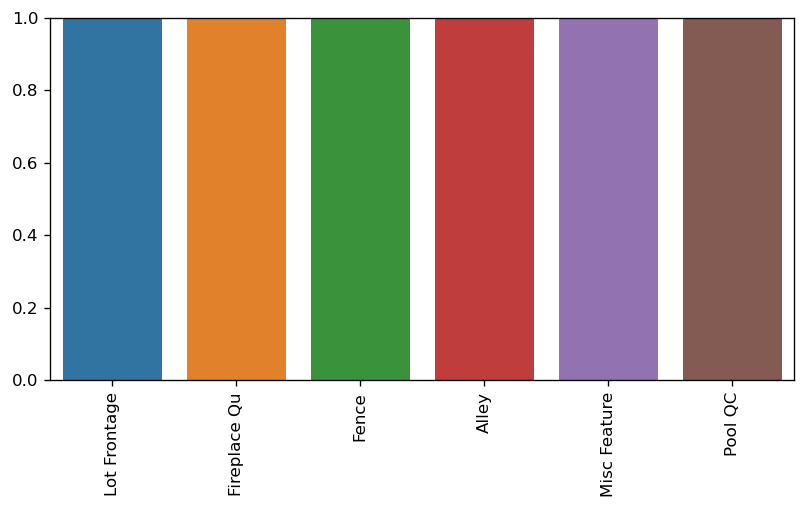

In [40]:
percent_nan = percent_missing(df)


fig, ax = plt.subplots(figsize=(8,4), dpi = 120)

sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation=90)

plt.ylim(0,1)

# FirePlaces QC

In [41]:
#FirePlaces will fillna with None as will assume the missing data are the house that no fireplaces QC

df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [42]:
df[df['Fireplace Qu'].isnull()]

Empty DataFrame
Columns: [MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, Sale Condition, SalePrice]
Index: []

[0 rows x 80 columns]

6. Drop The columns that has 50% missing data or 300 null data

In [43]:
df = df.drop(['Alley','Pool QC','Fence','Misc Feature' ], axis=1)

In [44]:
df.shape

(2904, 76)

(0.0, 1.0)

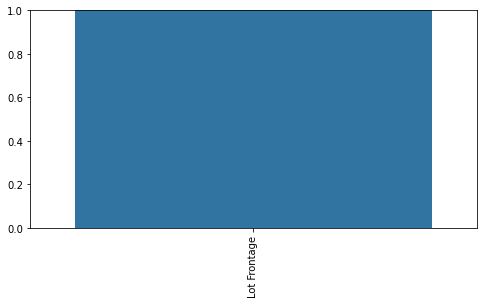

In [45]:
percent_nan = percent_missing(df)


fig, ax = plt.subplots(figsize=(8,4))

sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation=90)

plt.ylim(0,1)

# Imputation missing Data

7. Imputation: the process of replacing missing data with substituted values

To impute missing data we need to decide what other filled in(no NaN values) features most probably relates 

Neighborhood :physical locations within Ames city limits

Lot Frontage: Linear feet or street connected to property

so we will operate under the assumption that teh lot frontage is realted to the neighborhood

In [46]:
#Lot Frontage correlation with neighborhood

df.groupby ('Neighborhood')['Lot Frontage']

In [47]:
df.groupby ('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.851064
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.459770
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     61.705882
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.202247
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.535714
NoRidge    90.076923
NridgHt    84.037267
OldTown    61.681416
SWISU      59.046512
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.540373
StoneBr    62.511111
Timber     81.545455
Veenker    70.133333
Name: Lot Frontage, dtype: float64

8. Transfrom Column


In [48]:
df.head()['Lot Frontage']

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [49]:
df[df['Lot Frontage'].isnull()]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
11             20        RL           NaN      7980   Pave       IR1   
14            120        RL           NaN      6820   Pave       IR1   
21             60        FV           NaN      7500   Pave       Reg   
22             20        RL           NaN     11241   Pave       IR1   
23             20        RL           NaN     12537   Pave       IR1   
54             60        RL           NaN      7851   Pave       Reg   
56             80        RL           NaN      7750   Pave       IR1   
57             60        RL           NaN      9505   Pave       IR1   
73             60        RL           NaN      8880   Pave       IR1   
78             60        RL           NaN      9453   Pave       IR1   
85             20        RL           NaN      9819   Pave       IR1   
87             20        RL           NaN      6897   Pave       IR1   
98             20        FV           NaN      4403   Pave       IR2   
99            160        FV           NaN      2117   Pave       Reg   
100           160        FV           NaN      2980   Pave       Reg   
102           160        FV           NaN      2403   Pave       IR1   
107            60        RL           NaN     13517   Pave       IR1   
109            20        RL           NaN     10456   Pave       IR1   
111            20        RL           NaN     10603   Pave       IR1   
112            50        RL           NaN     18837   Pave       IR1   
117            20        RL           NaN      9790   Pave       Reg   
121            80        RL           NaN     10600   Pave       IR1   
122            80        RL           NaN     14112   Pave       IR1   
135            20        RL           NaN     19900   Pave       Reg   
139            20        RL           NaN      8050   Pave       IR1   
143            20        RL           NaN     12160   Pave       IR1   
158            20        RL           NaN      9830   Pave       IR1   
179            50        RM           NaN      8239   Pave       Reg   
191            75        RL           NaN      7793   Pave       IR1   
207            70        RL           NaN     24090   Pave       Reg   
212            70   C (all)           NaN      6449   Pave       IR1   
218            20        RL           NaN     11341   Pave       IR1   
220            20        RL           NaN      8246   Pave       IR1   
224            90        RL           NaN      7424   Pave       IR1   
226            60        RL           NaN     11616   Pave       IR1   
228            20        RL           NaN     20062   Pave       IR1   
231            40        RL           NaN     23595   Pave       Reg   
232            60        RL           NaN     17082   Pave       IR1   
241            20        RL           NaN     11200   Pave       IR1   
256            60        RL           NaN      9337   Pave       IR1   
259            60        RL           NaN     10900   Pave       IR1   
263            20        RL           NaN     11423   Pave       Reg   
267           120        RM           NaN      4435   Pave       Reg   
268           120        RM           NaN      4426   Pave       Reg   
288            30        RL           NaN      7890   Pave       Reg   
311            80        RL           NaN     12328   Pave       IR1   
312            90        RL           NaN     12760   Pave       IR1   
313            20        RL           NaN     57200   Pave       IR1   
324            20        RL           NaN     11875   Pave       Reg   
325           160        RM           NaN      1974   Pave       Reg   
333            20        RL           NaN     26142   Pave       IR1   
343            60        RL           NaN     11792   Pave       IR1   
346            80        RL           NaN      8530   Pave       IR1   
355            60        RL           NaN      9765   Pave       IR2   
356            60        RL           NaN     

In [50]:
df.iloc[21:26]['Lot Frontage']

21     NaN
22     NaN
23     NaN
24    65.0
25    70.0
Name: Lot Frontage, dtype: float64

In [51]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))
#take the value and fill it with mean

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
5        78.000000
6        41.000000
7        43.000000
8        39.000000
9        60.000000
10       75.000000
11       74.207207
12       63.000000
13       85.000000
14       62.511111
15      152.000000
16       88.000000
17      140.000000
18       85.000000
19      105.000000
20       85.000000
21       64.540373
22       75.210667
23       75.210667
24       65.000000
25       70.000000
26       70.000000
27       26.000000
28       21.000000
29       21.000000
30       21.000000
31       53.000000
32       24.000000
33       24.000000
34       24.000000
35      102.000000
36       98.000000
37       83.000000
38       94.000000
39       95.000000
40       90.000000
41       79.000000
42       70.000000
43      100.000000
44       44.000000
45      110.000000
46      105.000000
47       61.000000
48       41.000000
49       36.000000
50      100.000000
51       43.000000
52       43.

In [52]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean())).iloc[21:26]

21    64.540373
22    75.210667
23    75.210667
24    65.000000
25    70.000000
Name: Lot Frontage, dtype: float64

In [53]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

(0.0, 1.0)

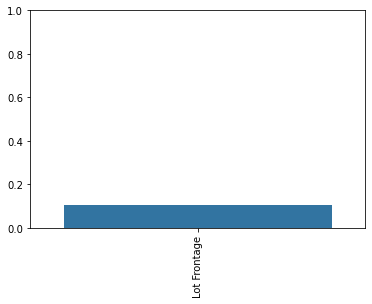

In [54]:
percent_nan = percent_missing(df)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [55]:
df[df['Lot Frontage'].isnull () == True]

#yang tiga row ni still ada missing data because of neighborhood tadi tidak ada correlation mean with lot Frontage. So replace je dengan zero. or maybe we can drop it but i want to assume it zero 

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
2237          120        RM           NaN      9763   Pave       IR1   
2765          160        RH           NaN      3612   Pave       IR1   
2869          120        RM           NaN      8239   Pave       IR1   

     Land Contour Utilities Lot Config Land Slope  ... Enclosed Porch  \
2237          Lvl    AllPub     Inside        Gtl  ...              0   
2765          Lvl    AllPub     Inside        Gtl  ...              0   
2869          Lvl    AllPub     Inside        Gtl  ...              0   

     3Ssn Porch Screen Porch Pool Area Misc Val  Mo Sold  Yr Sold  Sale Type  \
2237          0            0         0        0        9     2007        WD    
2765          0            0         0        0        6     2006        WD    
2869          0            0         0        0       11     2006        WD    

      Sale Condition SalePrice  
2237          Normal    330000  
2765          Normal    137000  
2869          Normal    230000  

[3 rows x 76 columns]

In [56]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [59]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

In [60]:
df.shape
#sbb dah 3 row (2 row sebab garage yr blt cannot be zero when have garage type, one row from elctrical missing data value)

(2904, 76)

In [61]:
df.to_csv("Ames_No_Missing_Data.csv", index = False)